### <b>Convolutional Neural Network (CNN) - Binary classification</b>

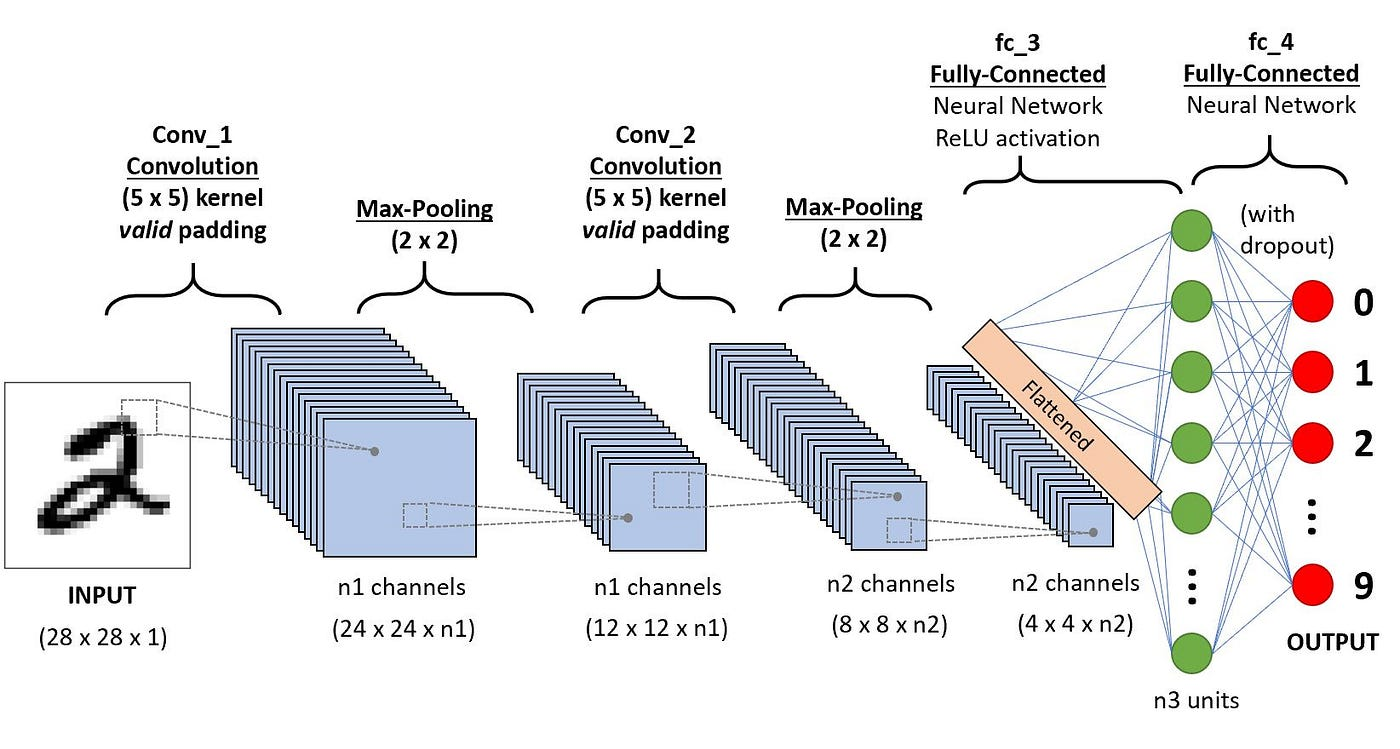
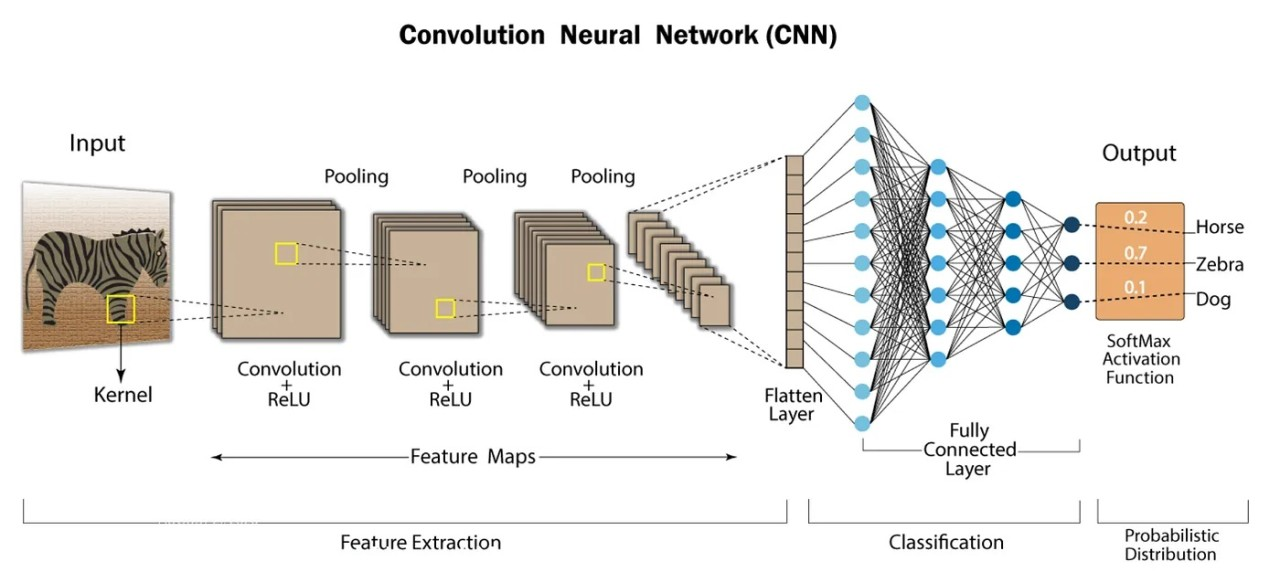
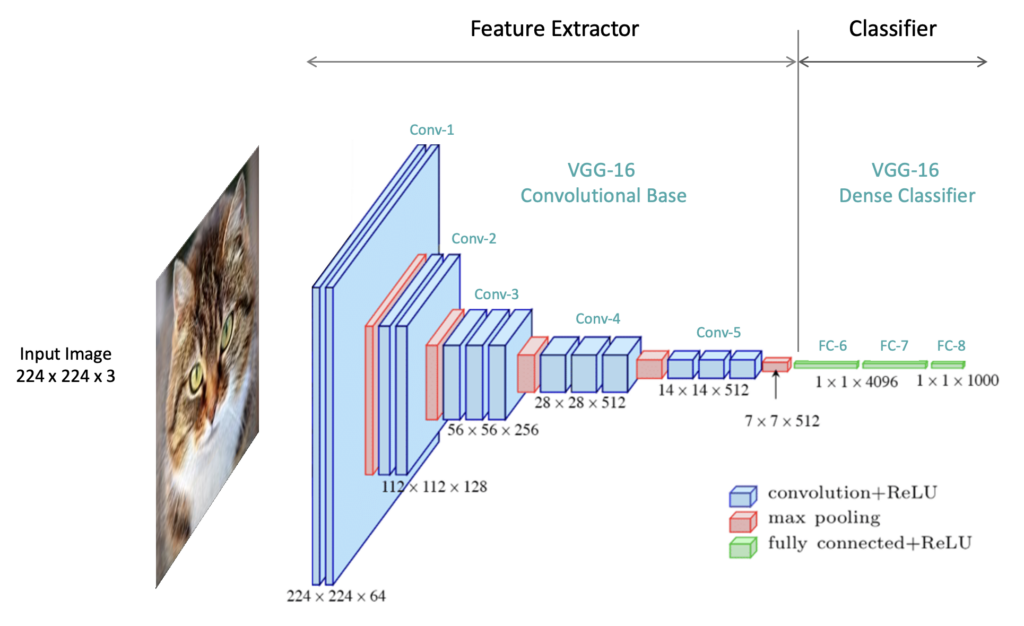
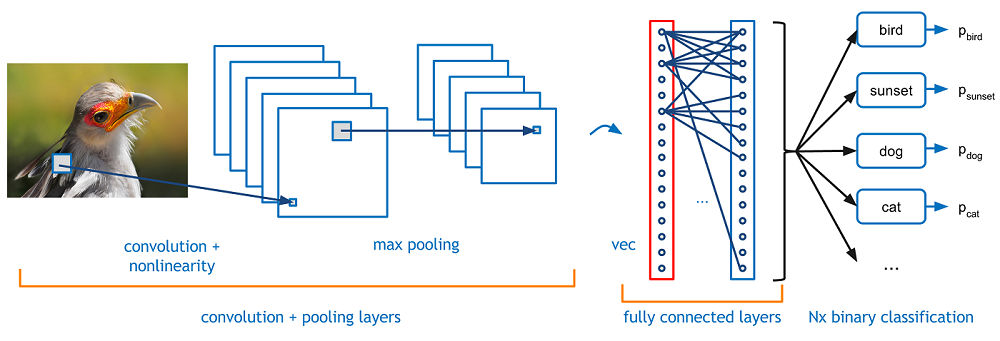
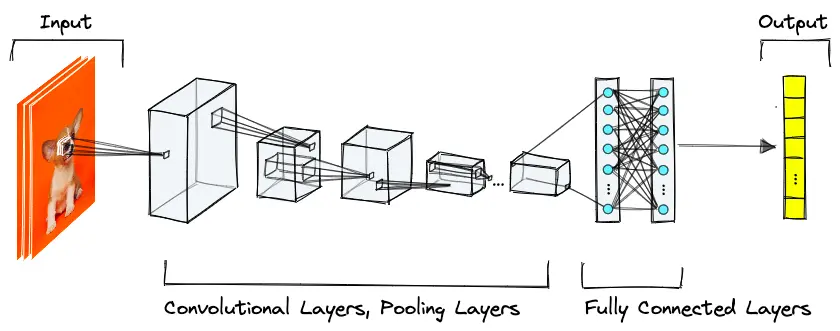

#### <b> 1. Loading/importing libraries</b>

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
tf.__version__

'2.17.0'

#### <b>2. Data preprocessing + Augmentation</b>

In [14]:
training_data_generator = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
training_set = training_data_generator.flow_from_directory(
    'dataset/training_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.


In [15]:
test_data_generator = ImageDataGenerator(rescale = 1./255)
test_set = test_data_generator.flow_from_directory(
    'dataset/test_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


### <b>3. Fitting and creating Convolutional Neural Network (CNN)</b>

##### <b> 3.1 Creating CNN</b>

In [16]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D( # First Convolution Layer
    filters = 32,
    kernel_size = 3,
    activation = 'relu',
    input_shape = [64, 64, 3]
))
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size = 2,
    strides = 2
))
cnn.add(tf.keras.layers.Conv2D( # Second Convolution Layer
    filters = 32,
    kernel_size = 3,
    activation = 'relu'
))
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size = 2,
    strides = 2
))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(
    units = 128, 
    activation = 'relu'
))
cnn.add(tf.keras.layers.Dense( # Output layer
    units = 1, 
    activation = 'sigmoid'
))

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

##### <b> 3.2 Fitting CNN</b>

In [18]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.5278 - loss: 0.7064

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 267ms/step - accuracy: 0.5280 - loss: 0.7063 - val_accuracy: 0.6790 - val_loss: 0.6076
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.6644 - loss: 0.6096 - val_accuracy: 0.7230 - val_loss: 0.5554
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.7219 - loss: 0.5620 - val_accuracy: 0.7445 - val_loss: 0.5190
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7341 - loss: 0.5276 - val_accuracy: 0.7430 - val_loss: 0.5238
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.7442 - loss: 0.5130 - val_accuracy: 0.7215 - val_loss: 0.5834
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.7535 - loss: 0.5035 - val_accuracy: 0.7785 - val_loss: 0.4704
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.7709 - loss: 0.4713 - val_accuracy: 0.7780 - val_loss: 0.4726
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7760 - loss: 0.4589 - val_accura

### <b> 4. Evaluating results/predicting</b>

In [19]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
prediction = result[0][0]
if prediction:
    print("Dog!")
else:
    print("Cat!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Dog!
